# System Properties

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Idealized Systems

Idealized systems are systems with idealized properties that typically render their practical implementation infeasible. They play an important role in various fields of signal processing as they allow a convenient formulation of concepts and principles. In the following, the ideal low-pass is introduced as prototype for an idealized frequency selective system. Other frequency selective system can be deduced directly from this prototype.

### Ideal Low-Pass

The transfer function $H(j \omega)$ of a real-valued [ideal low-pass](https://en.wikipedia.org/wiki/Sinc_filter) reads

\begin{equation}
H(j \omega) = \text{rect} \left( \frac{\omega}{2 \omega_\text{c}} \right)
\end{equation}

where $\omega_\text{c} > 0$ denotes its cut-off frequency. The ideal low-pass removes all frequency components above the cut-off frequency $\omega_\text{c}$, without affecting lower frequencies. The impulse response $h(t) = \mathcal{F}^{-1} \{ H(j \omega) \}$ is computed by applying the [duality principle](../fourier_transform/properties.ipynb#Duality) to the [Fourier transform of the rectangular signal](../fourier_transform/definition.ipynb#Transformation-of-the-Rectangular-Signal)

\begin{equation}
h(t) = \frac{\omega_\text{c}}{\pi} \cdot \text{sinc} ( \omega_\text{c} t )
\end{equation}

Since the impulse response is an acausal signal, the ideal low-pass is an [acausal system](causality_stability.ipynb#Condition-for-the-Impulse-Response). The sinc-function is furthermore not absolutely integrable. Hence the ideal-low pass is not a [stable system](causality_stability.ipynb#Condition-for-the-Impulse-Response) in the sense of the bounded-input bounded-output (BIBO) criterion. In conclusion, the ideal low-pass in not a realizable system. The ideal low-pass can only be approximated in practical systems. It plays nevertheless an important role in the foundations of sampling and interpolation.

#### Realizable low-pass

Various techniques have been developed in order to approximate the ideal low-pass by a realizable system. One is the *windowed sinc filter*. In order to make the ideal-low pass filter causal and stable, its impulse response is windowed to a finite-length $T$ followed by a temporal shift of $\frac{T}{2}$. Using the [rectanglar signal](../continuous_signals/standard_signals.ipynb#Rectangular-Signal) to truncate (window) the impulse response, the impulse response of the realizable low-pass is given as

\begin{equation}
h(t) = \frac{\omega_\text{c}}{\pi} \cdot \text{sinc} \left( \omega_\text{c} \left(t - \frac{T}{2} \right) \right) \cdot \text{rect}\left( \frac{1}{T} \left( t - \frac{T}{2} \right) \right)
\end{equation}

Fourier transformation yields its transfer function

\begin{equation}
H(j \omega) = \frac{1}{2 \pi} e^{-j \omega \frac{T}{2}} \cdot \text{rect}\left( \frac{\omega}{2 \omega_c} \right) * T \cdot \text{sinc} \left( \frac{T}{2} \omega \right)
\end{equation}

The impulse response is plotted for $w_\text{c}=10$ and $T=5$

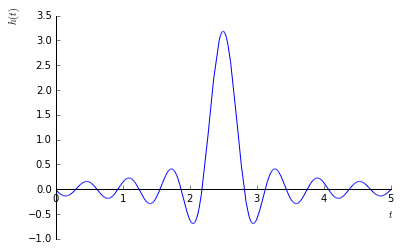

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, w = sym.symbols('t omega', real=True)
wc = 10
T = 5

h = wc/sym.pi * sym.sinc(wc*(t-T/2))
sym.plot(h, (t, 0, T), xlabel='$t$', ylabel='$h(t)$');

**Exercise**

* Discuss the properties of the magnitude response $|H(j \omega)|$ of the realizable low-pass in dependence of its length $T$. 

### Ideal Band-Pass

The transfer function $H(j \omega)$ of a real-valued ideal band-pass reads

\begin{equation}
H(j \omega) = 
\begin{cases}
1 & \text{for }  \omega_\text{c} - \frac{\Delta \omega}{2} < |\omega| < \omega_\text{c} + \frac{\Delta \omega}{2} \\
0 & \text{otherwise}
\end{cases}
\end{equation}

The ideal band-pass does not affect the frequency components of a signal around a given center frequency $\omega_\text{c}$ where the total width of this transition band is $\Delta \omega$. Components outside the transition band are removed. The transfer function can be rewritten as

\begin{equation}
H(j \omega) =
\text{rect} \left( \frac{\omega - \omega_\text{c}}{\Delta \omega} \right) + \text{rect} \left( \frac{\omega + \omega_\text{c}}{\Delta \omega} \right)
= \text{rect} \left( \frac{\omega}{\Delta \omega} \right) * \left( \delta(\omega - \omega_\text{c}) + \delta(\omega + \omega_\text{c}) \right)
\end{equation}

Its impulse response is computed by inverse Fourier transformation

\begin{equation}
h(t) = \pi \Delta \omega \cdot \text{sinc} ( \frac{\Delta \omega}{2} t ) \cdot \cos(\omega_\text{c} t)
\end{equation}

The ideal band-pass can be interpreted as a modulated low-pass filter. Due to its relation to the ideal low-pass, it is neither causal nor stable. The ideal band-pass can only be approximated in practical realizations. Its plays an important role in the theoretical foundations of wireless communications.

**Example**

For illustration, the impulse response of the ideal band-pass for $\omega_\text{c} = 10$ and $\Delta \omega = 2$ is plotted

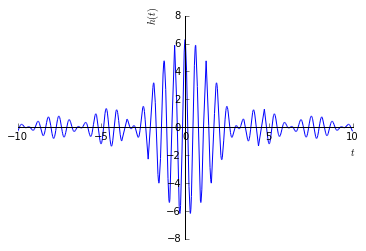

In [2]:
wc = 10
dw = 2

h = sym.pi*dw * sym.sinc(dw/2*t) * sym.cos(wc*t)
sym.plot(h, (t, -10, 10), xlabel='$t$', ylabel='$h(t)$');

**Exercise**

* In the same manner as for the low-pass, derive the impulse response and transfer function of a realizable band-pass.

### Ideal High-Pass

The transfer function $H(j \omega)$ of a real-valued ideal high-pass reads

\begin{equation}
H(j \omega) = 1 - \text{rect} \left( \frac{\omega}{2 \omega_\text{c}} \right)
\end{equation}

where $\omega_\text{c} > 0$ denotes its cut-off frequency. The ideal high-pass removes all frequency components below the cut-off frequency $\omega_\text{c}$, without affecting higher frequencies. Its impulse response can be derived in a straightforward way from the impulse response of the ideal low-pass

\begin{equation}
h(t) = \delta(t) - \frac{\omega_\text{c}}{\pi} \cdot \text{sinc} ( \omega_\text{c} t )
\end{equation}

Due to its relation to the ideal low-pass, the ideal high-pass is neither causal nor stable. The ideal high-pass can only be approximated in practical realizations.

### Ideal Band-Stop

The transfer function $H(j \omega)$ of a real-valued ideal band-stop is derived from the transfer function of the ideal band-pass in the same manner as the ideal high-pass. It reads

\begin{equation}
H(j \omega) =  1 - \text{rect} \left( \frac{\omega - \omega_\text{c}}{\Delta \omega} \right) - \text{rect} \left( \frac{\omega + \omega_\text{c}}{\Delta \omega} \right)
\end{equation}

The ideal band-stop removes the frequency components of a signal around a given center frequency $\omega_\text{c}$ where the total width of this stop band is $\Delta \omega$. Components outside the stop band are not affected by the system.  The impulse response of the ideal band-stop can be derived in a straightforward way from the impulse response of the ideal band-pass as

\begin{equation}
h(t) = \delta(t) - \pi \Delta \omega \cdot \text{sinc} ( \frac{\Delta \omega}{2} t ) \cdot \cos(\omega_\text{c} t)
\end{equation}

Due to its relation to the ideal band-pass, the ideal band-stop is neither causal nor stable. The ideal band-stop can only be approximated in practical realizations. The ideal band-stop is for instance used to remove undesired signal components.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.